<b> <h2> <font color='darkblue'> MOBILE PHONE SALE PRICE PREDICTION- LINEAR REGRESSION PREDICTION </font> </h2> </b>

- **Source**: https://www.kaggle.com/artempozdniakov/ukrainian-market-mobile-phones-data

## Problem Statement
For Every New Mobile-Phone that comes to market,the objective of that company is to dominant the moblile phone sector.The company objective is to increase its revenue by aquiring customer by provide mobile phone for diverse customer.

## Data Definition

**brand_name** : The name of brand which manufactures the phone. (Categoric)

**model_name** : The name of phone's model.(Categoric)

**os** : The operating system of the phone. (Categoric)

**popularity** : The popularity of the phone. (Numeric)

**best_price** : Best price of the price-range in Ukrainian hryvnias (UAH).  (Numeric)

**lowest_price** : Lowest price of the price-range in Ukrainian hryvnias (UAH).  (Numeric)

**Highest_price** : Highest price of the price-range in Ukrainian hryvnias (UAH).  (Numeric)

**sellers_amount** : The amount of sellers, who sale this phone. (Numeric)

**screen_size** : The size of phone's screen (inches). (Numeric)

**memory_size** : The size of phone's memory (GB). (Numeric)

**battery_size** : The size of phone's battery (mAh). (Numeric)

**release_date** : The year and moth, when the phone was released. (Categoric)


## 1. Import Libraries

**Let us import the required libraries and functions**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 

import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt


# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

## 2. Read Data

**Read and display data to get insights from the data**

In [2]:
#Reading the csv file using pandas
df_phone = pd.read_csv('phones_data.csv',index_col=0)

#Displaying the first 5 observation using the head()
df_phone.head()

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690,1529.000000,1819.000000,36,5.000000,8.000000,2000.000000,Oct-20
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803,1659.000000,2489.000000,36,5.000000,16.000000,2000.000000,Sep-20
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803,1659.000000,2489.000000,36,5.000000,16.000000,2000.000000,Sep-20
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803,1659.000000,2489.000000,36,5.000000,16.000000,2000.000000,Sep-20
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999,nan,nan,10,5.710000,16.000000,3000.000000,Apr-20


## 3. Data Analysis and Preprocessing

**Understanding the Dataset**

 ### 3.1 Datset Dimension

In [3]:
# datset Dimension
df_phone.shape

(1224, 12)

- The dataset has **12** columns and **1224** observation.

### 3.2 Check data types

In [4]:
# data type of the columns
df_phone.dtypes

brand_name         object
model_name         object
os                 object
popularity          int64
best_price          int64
lowest_price      float64
highest_price     float64
sellers_amount      int64
screen_size       float64
memory_size       float64
battery_size      float64
release_date       object
dtype: object

- The **brand_name,model_name,os.release_date** are Categorically Variable and **popularity,,best_price,lowest_price                   highest_price,sellers_amount,screen_size,memory_size,battery_size** are numerical variable.

### 3.3 Summary Statistics

#### 3.3.1 For numerical variables, we use .describe()

In [5]:
# describe() for numerical variable
df_phone.describe()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,1224.000000,1224.000000,964.000000,964.000000,1224.000000,1222.000000,1113.000000,1214.000000
mean,612.500000,7941.206699,7716.018672,9883.410788,16.743464,5.394378,95.694442,3608.201812
std,353.482673,8891.836260,8560.959059,11514.936818,20.597006,1.476991,111.872397,1668.268774
min,1.000000,214.000000,198.000000,229.000000,1.000000,1.400000,0.003200,460.000000
25%,306.750000,2599.750000,2399.000000,2887.000000,2.000000,5.162500,32.000000,2900.000000
50%,612.500000,4728.000000,4574.000000,5325.500000,8.000000,6.000000,64.000000,3687.000000
75%,918.250000,9323.000000,9262.250000,12673.750000,26.000000,6.400000,128.000000,4400.000000
max,1224.000000,56082.000000,49999.000000,69999.000000,125.000000,8.100000,1000.000000,18800.000000


- The average best_price of a phone is **7941.01**  Ukraine Currency. The best_price is between **214** and **56082**.
- We can as see that the count of few of the columns are less which in-turn means there are few missing value.
- Few columns have outlier which can be seen from mean and their min and max value.

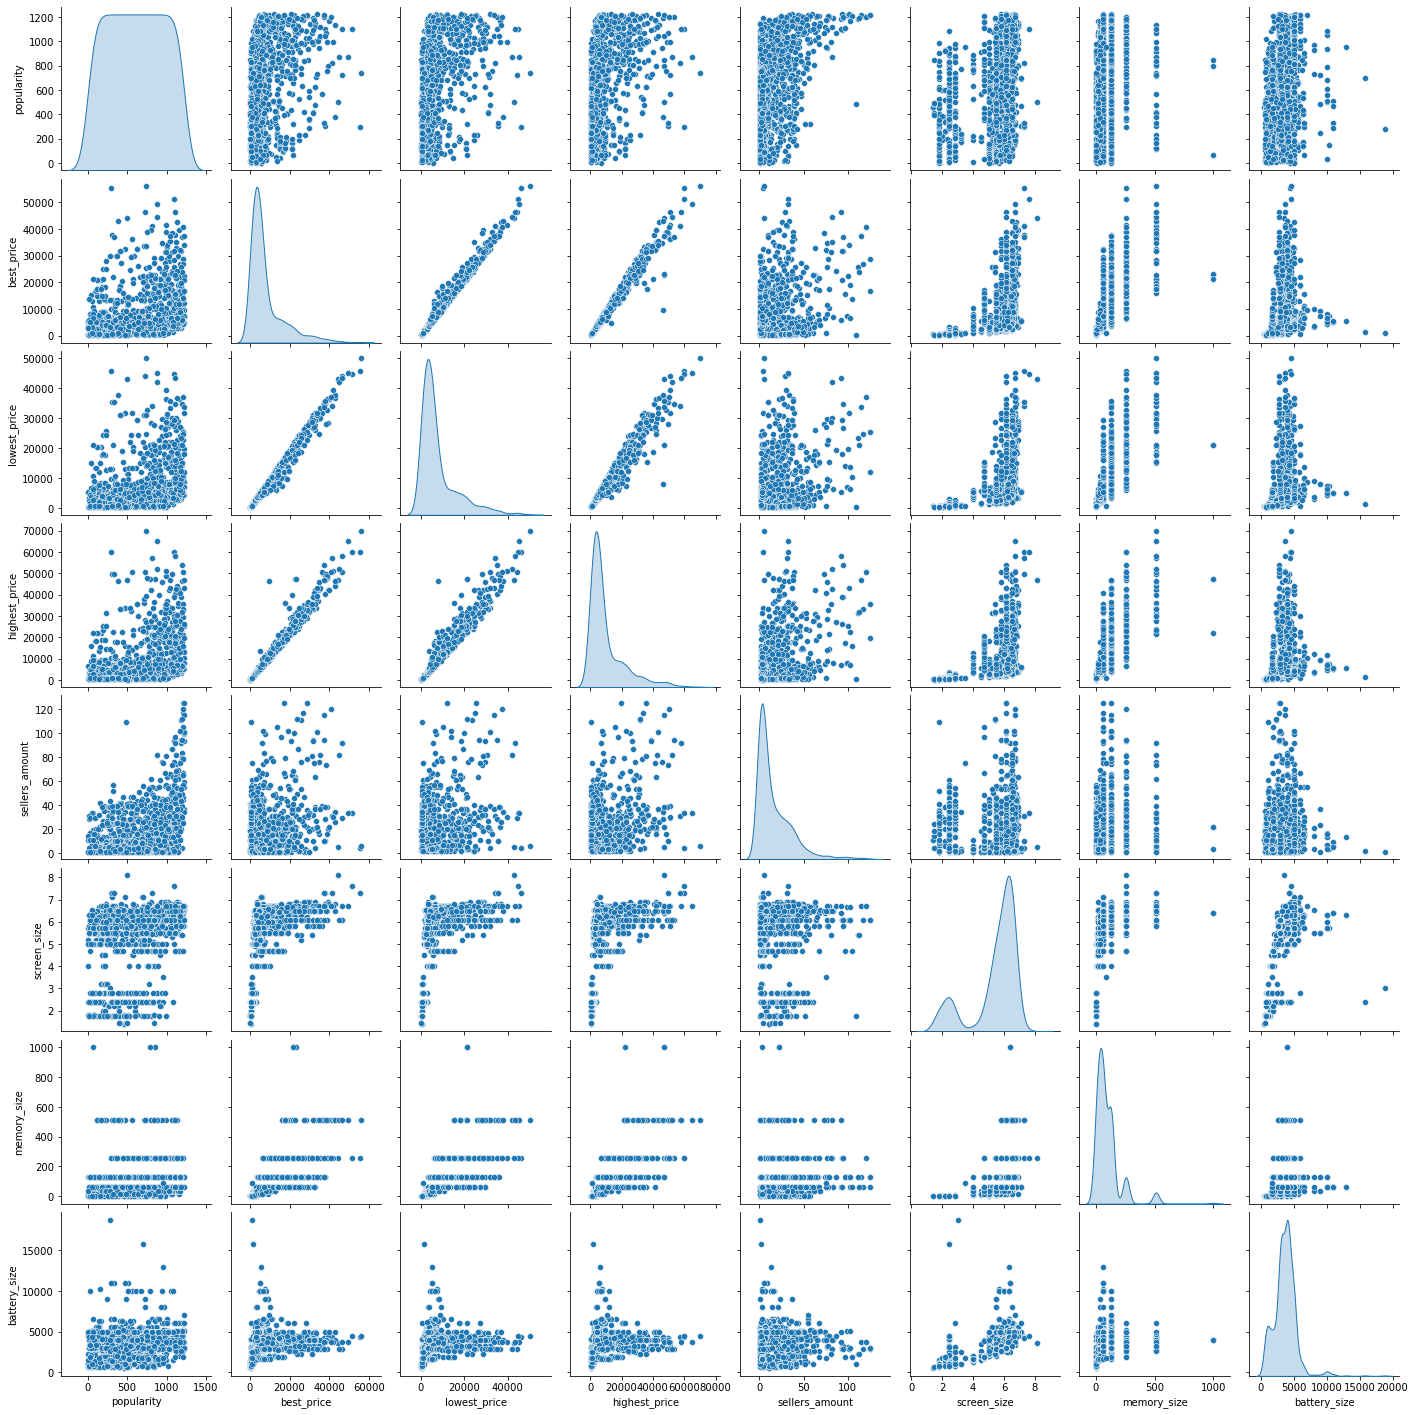

In [6]:
# plotting the pair plot for all the numerical variable
phone_numeric_feature=df_phone.select_dtypes(include=np.number)

#create pairplot 
sns.pairplot(phone_numeric_feature, diag_kind = 'kde')

# display the plot
plt.show()

- Popularity is normally distributed, whereas others are either right skewed or left skewed.

#### 3.3.2 For categorical features, we use .describe(include=object)

In [7]:
# include=object: selects the categorical features
df_phone.describe(include = object)

,brand_name,model_name,os,release_date
count,1224,1224,1028,1224
unique,64,1068,6,73
top,Samsung,Galaxy A50s 2019 SM-A507FD 6/128GB Black,Android,Oct-20
freq,168,3,916,79


- We see that **Samsung  Brand** has more number of the model compared to others Brands. 
- **Andriod** OS has more prefered OS.

In [8]:
# selecting the categorically variable
phone_categoric_features = df_phone.select_dtypes(include='object').drop(['model_name','release_date'], axis=1)
phone_categoric_features.head()

,brand_name,os
0,ALCATEL,Android
1,ALCATEL,Android
2,ALCATEL,Android
3,ALCATEL,Android
4,Nokia,Android


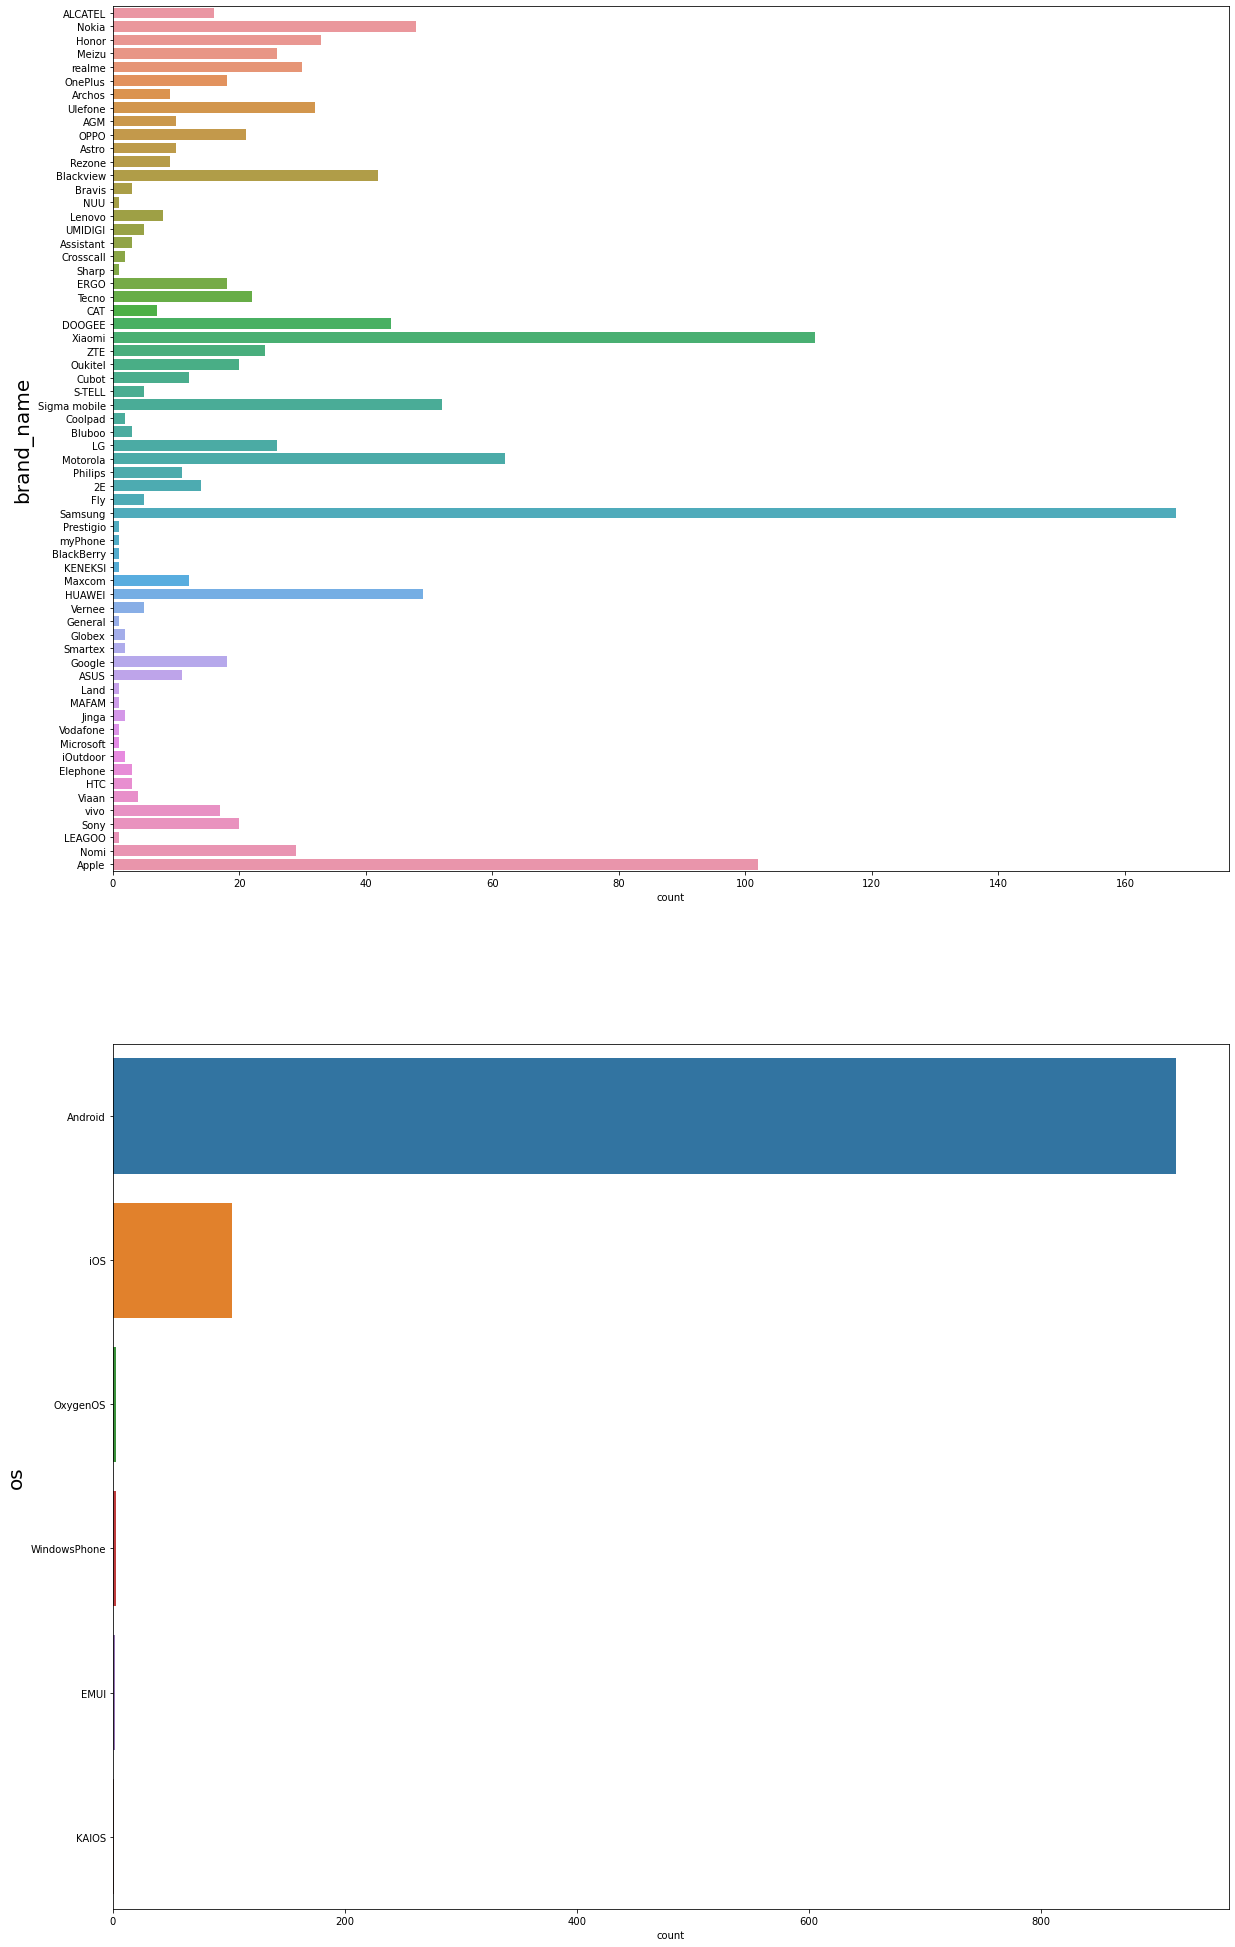

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(20, 35))
for variable, subplot in zip(phone_categoric_features, ax.flatten()):
    countplot = sns.countplot(y=df_phone[variable], ax=subplot )
    countplot.set_ylabel(variable, fontsize = 20)
plt.show()

- We see that **Samsung Brand** has more number of the model compared to others Brands.
- **Andriod** OS has more prefered OS.

### 3.4 Missing Values

In [10]:
# 'isnull().sum()' returns the number of missing values in each variable
# sort_values will give null count in descending order
Total = df_phone.isnull().sum().sort_values(ascending=False) 

# Percentage of null value for each column 
Percent = (df_phone.isnull().sum()*100/df_phone.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function 
# axis = 1: concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

# print the missing data
missing_data

,Total,Percentage of Missing Values
highest_price,260,21.241830
lowest_price,260,21.241830
os,196,16.013072
memory_size,111,9.068627
battery_size,10,0.816993
screen_size,2,0.163399
release_date,0,0.000000
sellers_amount,0,0.000000
best_price,0,0.000000
popularity,0,0.000000


- The missing values are present in the data for the **Highest_price,Lowest_price,OS,Memory_size,Battery_size and Screen_size** variables. None of the column has missing value percentage more than 80%,so we cant drop any column.

### Visualize Missing Values using Heatmap

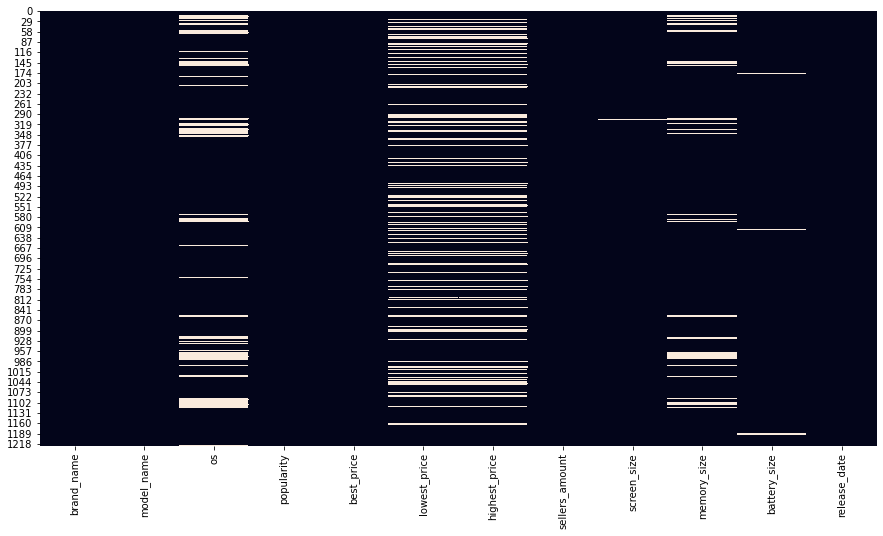

In [11]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot heatmap to check null values
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True' 
sns.heatmap(df_phone.isnull(), cbar=False)

# display the plot
plt.show()

- Missing value for **Lowest Price** and **Highest Price** are at same rows

### 3.5 Handling Missing Values

#### For Category Columns

#####   3.5.1 OS

In [12]:
# checking number of null value in OS column
df_phone.os.isnull().sum()

196

- **196** value has null value for OS column

In [13]:
# Seeing the model name with respective to null value
df_phone.model_name[df_phone.os.isnull()]

12                     105 DS 2019 Pink (16KIGP01A01)
13              105 Dual Sim 2019 Black (16KIGB01A01)
14              105 Dual Sim 2019 Black (16KIGB01A01)
15                 105 Dual Sim New Black (A00028315)
16            105 Single Sim 2019 Black (16KIGB01A13)
17             105 Single Sim 2019 Pink (16KIGP01A13)
18               105 Single Sim New Black (A00028356)
19               105 Single Sim New Black (A00028356)
20                105 Single Sim New Blue (A00028372)
21               105 Single Sim New White (A00028371)
22                      106 New DS Grey (16NEBD01A02)
23                      106 New DS Grey (16NEBD01A02)
26              110 Dual Sim 2019 Black (16NKLB01A07)
27               110 Dual Sim 2019 Blue (16NKLL01A04)
28                   125 Dual Sim Black (16GMNB01A17)
36                                          150 Black
37                    150 Dual Sim Cyan (16GMNE01A04)
38                     150 Dual Sim Red (16GMNR01A02)
39                          

In [14]:
#replacing the nan value with KAIOS
df_phone.os.replace(np.NaN,'KAIOS',inplace=True)

- After looking into the **Model_Name** we observed all of them are non_smart handset,So we have replaced it with KAIOS.

#### For numerical Columns

#####  3.5.2  Battery_size

In [15]:
# summary stats for battery_size columns before filling null value
df_phone['battery_size'].describe()

count    1214.000000
mean     3608.201812
std      1668.268774
min       460.000000
25%      2900.000000
50%      3687.000000
75%      4400.000000
max     18800.000000
Name: battery_size, dtype: float64

In [16]:
#Printing mean and median before replacing the value
print('Mean of Battery_size: ',df_phone.battery_size.mean())
print('Median of Battery_size: ',df_phone.battery_size.median())

Mean of Battery_size:  3608.2018121911037
Median of Battery_size:  3687.0


- **Mean** and **Median** is almost similar

In [17]:
# replacing the missing value of battery_size with median value using replace() function
df_phone.battery_size.replace(np.NaN,df_phone['battery_size'].median(),inplace = True)

In [18]:
#Printing mean and median after replacing the missing value
print('Mean of Battery_size: ',df_phone.battery_size.mean())
print('Median of Battery_size: ',df_phone.battery_size.median())

Mean of Battery_size:  3608.845588235294
Median of Battery_size:  3687.0


- **Mean** and **Median** is almost similiar even after replacing the null value.

#####  3.5.3 Screen_size

In [19]:
# summary stats for screen_size column
df_phone['screen_size'].describe()

count   1222.000000
mean       5.394378
std        1.476991
min        1.400000
25%        5.162500
50%        6.000000
75%        6.400000
max        8.100000
Name: screen_size, dtype: float64

In [20]:
#Printing mean and median before replacing the value
print('Mean of Screen_size: ',df_phone.screen_size.mean())
print('Median of Screen_size: ',df_phone.screen_size.median())

Mean of Screen_size:  5.394378068739773
Median of Screen_size:  6.0


- **Mean** and **Median**  is almost same.

In [21]:
# replacing the missing value of Screen_size with median value using replace() function
df_phone.screen_size.replace(np.NaN,df_phone['screen_size'].median(),inplace = True)

In [22]:
#Printing mean and median after replacing the value
print('Mean of Screen_size: ',df_phone.screen_size.mean())
print('Median of Screen_size: ',df_phone.screen_size.median())

Mean of Screen_size:  5.395367647058825
Median of Screen_size:  6.0


-  **Mean** and **Median** of Screen_Size is similar before and after replacing the null value.

#####  3.5.4 Memory_size

In [23]:
# summary stats for memory_size column
df_phone['memory_size'].describe()

count   1113.000000
mean      95.694442
std      111.872397
min        0.003200
25%       32.000000
50%       64.000000
75%      128.000000
max     1000.000000
Name: memory_size, dtype: float64

In [24]:
#Printing mean and median before replacing the value
print('Mean of Memory_size: ',df_phone.memory_size.mean())
print('Median of Memory_size: ',df_phone.memory_size.median())

Mean of Memory_size:  95.69444192150058
Median of Memory_size:  64.0


- Replacing the memory size with average of **KAIOS** phone for all the missing value because the all are **KAIOS** handset

In [25]:
# finding the average of KAIOS phone
avg_mean=round(df_phone[df_phone.os=='KAIOS']['memory_size'].mean(),2)

# replacing the missing value of memory_size with mean value using replace() function
df_phone.memory_size.replace(np.NaN,avg_mean,inplace = True)

In [26]:
#Printing mean and median  after replacing the value
print('Mean of Memory_size: ',df_phone.memory_size.mean())
print('Median of Memory_size: ',df_phone.memory_size.median())

Mean of Memory_size:  87.13416164920778
Median of Memory_size:  64.0


- **Mean** has decreased from original mean.

#####  3.5.5 Lowest Price and Highest Price

In [27]:
# summary stats for Lowest price
df_phone.lowest_price.describe()

count     964.000000
mean     7716.018672
std      8560.959059
min       198.000000
25%      2399.000000
50%      4574.000000
75%      9262.250000
max     49999.000000
Name: lowest_price, dtype: float64

In [28]:
#Printing mean and median  before replacing the value
print('Mean of lowest_price: ',df_phone.lowest_price.mean())
print('Median of lowest_price: ',df_phone.lowest_price.median())

Mean of lowest_price:  7716.01867219917
Median of lowest_price:  4574.0


- Replacing the **Lowest_Price** based on the **Memory_Size**.

In [29]:
# index has index value all the null value point
index = np.where(df_phone.lowest_price.isnull())[0]

# using For loop for iterating through the datapoint in the dataset and changing the value
for ind in index: 
    if df_phone.loc[ind,"memory_size"] == 0.0032:           
        df_phone.loc[ind,"lowest_price"] =  2016.000000 
         
    elif df_phone.loc[ind,"memory_size"] == 1.3:         
        df_phone.loc[ind,"lowest_price"] =  198.0  
        
    elif df_phone.loc[ind,"memory_size"] == 0.0040:         
        df_phone.loc[ind,"lowest_price"] =  495.000000  
        
    elif df_phone.loc[ind,"memory_size"] ==  0.0160 :
        df_phone.loc[ind,"lowest_price"] =  1419.250000 
        
    elif df_phone.loc[ind,"memory_size"] == 0.0320:         
        df_phone.loc[ind,"lowest_price"] =  566.941176
        
    elif df_phone.loc[ind,"memory_size"] ==  0.0640 :
        df_phone.loc[ind,"lowest_price"] =  424.250000
        
    elif df_phone.loc[ind,"memory_size"] == 0.1280:         
        df_phone.loc[ind,"lowest_price"] =  1599.000000
        
    elif df_phone.loc[ind,"memory_size"] ==  4.0000 :
        df_phone.loc[ind,"lowest_price"] =  2341.666667
        
    elif df_phone.loc[ind,"memory_size"] == 8.0000:         
        df_phone.loc[ind,"lowest_price"] =  1830.700000  
        
    elif df_phone.loc[ind,"memory_size"] ==  16.0000 :
        df_phone.loc[ind,"lowest_price"] =  2531.189189 
        
    elif df_phone.loc[ind,"memory_size"] == 32.0000:         
        df_phone.loc[ind,"lowest_price"] =  3696.738095
        
    elif df_phone.loc[ind,"memory_size"] ==  64.0000 :
        df_phone.loc[ind,"lowest_price"] =  6297.135371
        
    elif df_phone.loc[ind,"memory_size"] == 128.0000:         
        df_phone.loc[ind,"lowest_price"] =  10966.333333
        
    elif df_phone.loc[ind,"memory_size"] ==  256.0000 :
        df_phone.loc[ind,"lowest_price"] =  20858.725000
        
    elif df_phone.loc[ind,"memory_size"] == 512.0000:         
        df_phone.loc[ind,"lowest_price"] =  29000.900000
        
    elif df_phone.loc[ind,"memory_size"] ==  1000.0000 :
        df_phone.loc[ind,"lowest_price"] =  20981.333333

- All the **Lowest Price** are replaced

In [30]:
#Printing mean,median and mode after replacing the value
print('Mean of lowest_price: ',df_phone.lowest_price.mean())
print('Median of lowest_price: ',df_phone.lowest_price.median())

Mean of lowest_price:  7357.866949221399
Median of lowest_price:  4499.0


- **Mean** and **Median** value without replacing null value is slightly difference than replacing null value for **Lowest Price**.

In [31]:
# summary stats for Highest price
df_phone.highest_price.describe()

count     964.000000
mean     9883.410788
std     11514.936818
min       229.000000
25%      2887.000000
50%      5325.500000
75%     12673.750000
max     69999.000000
Name: highest_price, dtype: float64

In [32]:
#Printing mean and median  before replacing the value
print('Mean of highest_price: ',df_phone.highest_price.mean())
print('Median of highest_price: ',df_phone.highest_price.median())

Mean of highest_price:  9883.410788381743
Median of highest_price:  5325.5


- Replacing the **Highest_Price** based on the **Memory_Size**.

In [33]:
# index has index value all the null value point
index = np.where(df_phone.highest_price.isnull())[0]

# using For loop for iterating through the datapoint in the dataset and changing the value
for ind in index:                                               
    if df_phone.loc[ind,"memory_size"] == 0.0032:           
        df_phone.loc[ind,"highest_price"] =  2099.000000 
        
    elif df_phone.loc[ind,"memory_size"] == 0.0040:         
        df_phone.loc[ind,"highest_price"] =  818.400000 
    
    elif df_phone.loc[ind,"memory_size"] == 1.3:         
        df_phone.loc[ind,"highest_price"] = 229
        
    elif df_phone.loc[ind,"memory_size"] ==  0.0160 :
        df_phone.loc[ind,"highest_price"] =  1696.500000 
        
    elif df_phone.loc[ind,"memory_size"] == 0.0320:         
        df_phone.loc[ind,"highest_price"] =  724.607843
        
    elif df_phone.loc[ind,"memory_size"] ==  0.0640 :
        df_phone.loc[ind,"highest_price"] =  656.750000
        
    elif df_phone.loc[ind,"memory_size"] == 0.1280:         
        df_phone.loc[ind,"highest_price"] =  2389.000000
        
    elif df_phone.loc[ind,"memory_size"] ==  4.0000 :
        df_phone.loc[ind,"highest_price"] =  2699.000000
        
    elif df_phone.loc[ind,"memory_size"] == 8.0000:         
        df_phone.loc[ind,"highest_price"] =  2385.700000  
        
    elif df_phone.loc[ind,"memory_size"] ==  16.0000 :
        df_phone.loc[ind,"highest_price"] =  3106.837838 
        
    elif df_phone.loc[ind,"memory_size"] == 32.0000:         
        df_phone.loc[ind,"highest_price"] =  4601.222222
        
    elif df_phone.loc[ind,"memory_size"] ==  64.0000 :
        df_phone.loc[ind,"highest_price"] =  5909.924242
        
    elif df_phone.loc[ind,"memory_size"] == 128.0000:         
        df_phone.loc[ind,"highest_price"] =  13544.232068
        
    elif df_phone.loc[ind,"memory_size"] ==  256.0000 :
        df_phone.loc[ind,"highest_price"] =  26848.462500
        
    elif df_phone.loc[ind,"memory_size"] == 512.0000:         
        df_phone.loc[ind,"highest_price"] =  39802.600000
        
    elif df_phone.loc[ind,"memory_size"] ==  1000.0000 :
        df_phone.loc[ind,"highest_price"] =  38846.000000

In [34]:
#Printing mean and median  after replacing the value
print('Mean of highest_price: ',df_phone.highest_price.mean())
print('Median of highest_price: ',df_phone.highest_price.median())

Mean of highest_price:  9290.861464051479
Median of highest_price:  5295.5


- **Mean** and **Median** value without replacing null value is slightly difference than replacing null value for **Highest Price**.

### Visualize Missing Values using Heatmap

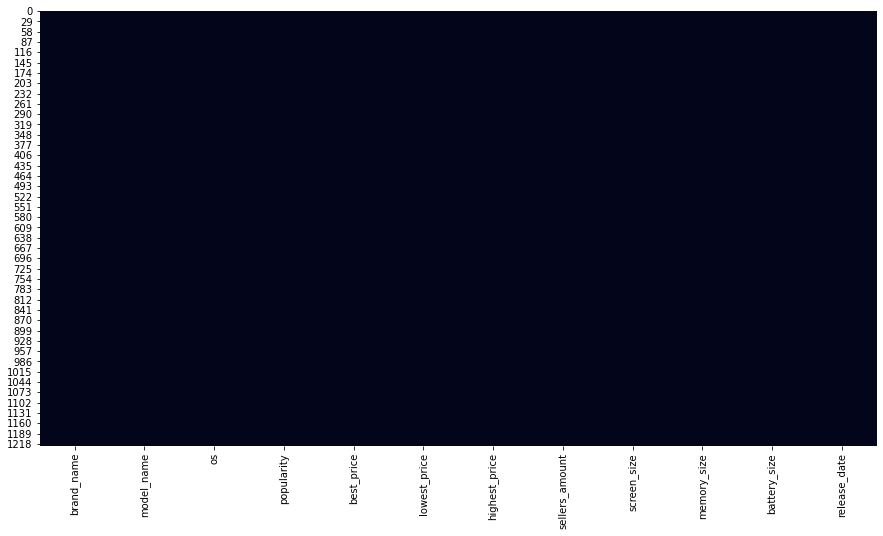

In [35]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot heatmap to check null values
sns.heatmap(df_phone.isnull(), cbar=False)

# display the plot
plt.show()

- There are **No Null** value.

## 4. Correlation

In [36]:
phone_numeric_feature=df_phone.select_dtypes(include=np.number)
phone_numeric_feature.head()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
0,422,1690,1529.000000,1819.000000,36,5.000000,8.000000,2000.000000
1,323,1803,1659.000000,2489.000000,36,5.000000,16.000000,2000.000000
2,299,1803,1659.000000,2489.000000,36,5.000000,16.000000,2000.000000
3,287,1803,1659.000000,2489.000000,36,5.000000,16.000000,2000.000000
4,1047,1999,2531.189189,3106.837838,10,5.710000,16.000000,3000.000000


<AxesSubplot:>

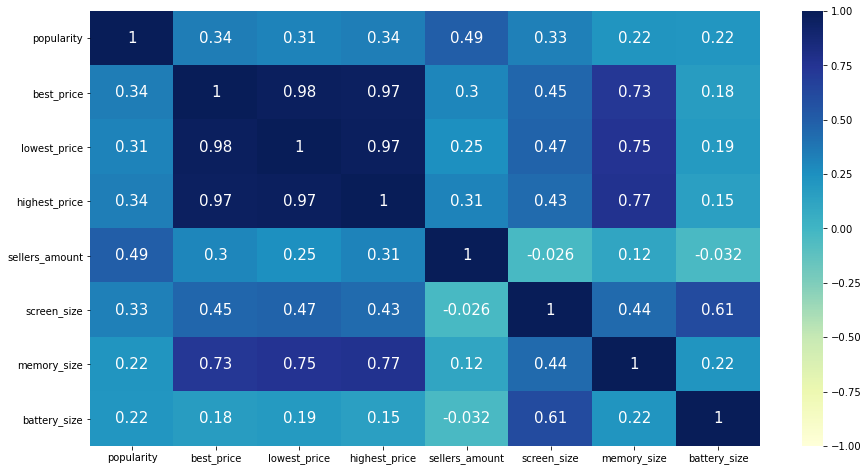

In [37]:
# Include only the numerical variable for creating the correlation matrix
df_num_var=df_phone.select_dtypes(include=np.number)

# set the figure size
plt.figure(figsize=(15, 8))

# plot the heat map
# corr: give the correlation matrix
sns.heatmap(df_num_var.corr(), cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )

## 5. Multi-Collinearity

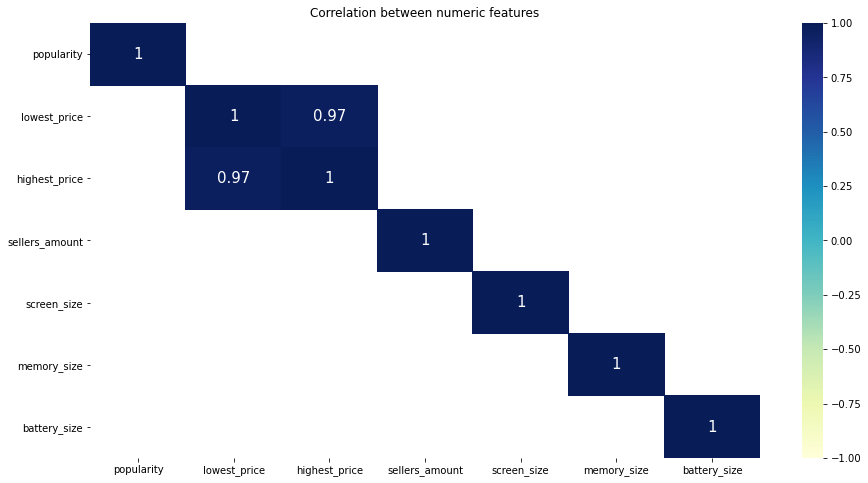

In [38]:
# Dropping the target variable that is Best_Price
df_phone_corr=df_phone.drop('best_price',axis=1)

# Include only the numerical variable for creating the correlation matrix
df_num_var=df_phone_corr.select_dtypes(include=np.number)

# set the figure size
plt.figure(figsize=(15, 8))

# plot the heat map
# corr: give the correlation matrix
sns.heatmap(df_num_var.corr()[np.abs(df_num_var.corr()) > 0.8], cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )

# specify name of the plot using plt.title()
plt.title('Correlation between numeric features')

# display the plot
plt.show()

- The above heatmap, show that their is strong positive correlation between **Highest Price** and **Lowest Price**.

## 6. Outlier

### 6.1 Visualize Outlier 

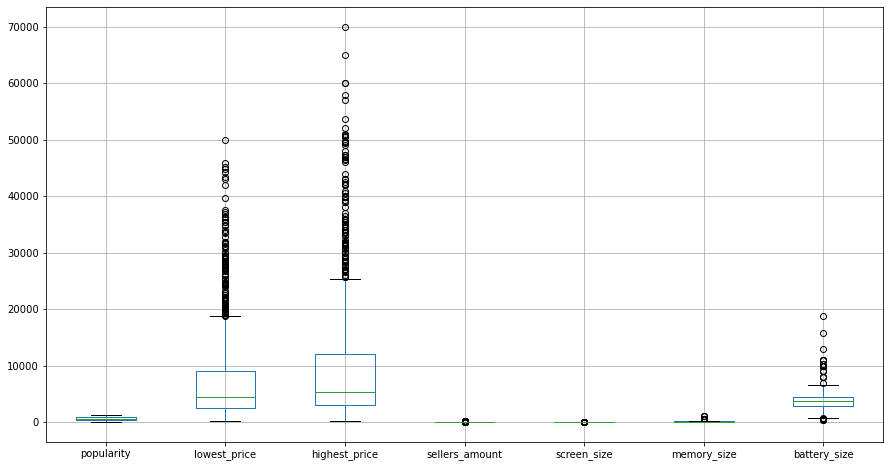

In [39]:
# set the plot size
plt.rcParams['figure.figsize']=(15,8)

# create a boxplot for all numeric features
df_num_var.boxplot()

# to display the plot
plt.show()

- From above Boxplot, We can observe that **Lowest Price**,**Highest Price**,**Memory Size** and **Battery Size** are have outlier.

### 6.2  Handling Outlier 

In [40]:
# numerical variable are selected 
df_num=df_phone.select_dtypes(include=np.number)

In [41]:
# obtain the first quartile
Q1 = df_num.quantile(0.25)

# obtain the third quartile
Q3 = df_num.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)


popularity        611.500000
best_price       6723.250000
lowest_price     6480.560811
highest_price    8892.162162
sellers_amount     24.000000
screen_size         1.212500
memory_size       112.000000
battery_size     1485.000000
dtype: float64


In [42]:
# filter out the outlier values
df_phone_iqr = df_phone[~((df_phone < (Q1 - 1.5 * IQR)) |(df_phone > (Q3 + 1.5 * IQR))).any(axis=1)]

In [43]:
df_phone_iqr.shape

(837, 12)

- After the IQR treatment, the shape of the dataset has dropped to **(837,12)**.

## 7. Removing insignificiant Feature 

In [44]:
# Creating a copy of main dataset
df_phone_copy=df_phone.copy()

In [45]:
# dropping the model_name and release date
df_phone_copy.drop(['model_name','release_date','highest_price','lowest_price'],axis=1,inplace = True)

- Dropped the **Model_Name** , **highest_price** , **lowest_price** and **Release_Date**.

In [46]:
df_phone_copy.head()

,brand_name,os,popularity,best_price,sellers_amount,screen_size,memory_size,battery_size
0,ALCATEL,Android,422,1690,36,5.000000,8.000000,2000.000000
1,ALCATEL,Android,323,1803,36,5.000000,16.000000,2000.000000
2,ALCATEL,Android,299,1803,36,5.000000,16.000000,2000.000000
3,ALCATEL,Android,287,1803,36,5.000000,16.000000,2000.000000
4,Nokia,Android,1047,1999,10,5.710000,16.000000,3000.000000


## 8. Feature Transformation

In [47]:
# Dropping the target variable
df_phone_copy=df_phone_copy.drop('best_price',axis=1)
# Selecting only the numerical faeture using select_dtypes()
df_numeric_features=df_phone_copy.select_dtypes(include=np.number)

# Selecting only the categorically feature using select_dtypes()
df_categoric_features=df_phone_copy.select_dtypes(include=object)
    
    
# Transformation the numeric variables
# the lambda function scales the data
df_num_scaled = np.sqrt(df_numeric_features)

# create a dataframe
# axis=1: specifies that the concatenation is column wise
df_phone_scaled = pd.concat([df_num_scaled, df_categoric_features], axis = 1)

## 9. Feature Scaling

In [48]:
# Selecting only the numerical faeture using select_dtypes()
df_numeric_features=df_phone_copy.select_dtypes(include=np.number)

# Selecting only the categorically faeture using select_dtypes()
df_categoric_features=df_phone_copy.select_dtypes(include=object)
    
    
# scale the numeric variables
# the lambda function scales the data
df_num_scaled = df_numeric_features.apply(lambda rec: (rec - rec.mean()) / rec.std())

# create a dataframe
# axis=1: specifies that the concatenation is column wise
df_phone_scaled = pd.concat([df_num_scaled, df_categoric_features], axis = 1)

## 10. Encoding for Categorically Variable

In [49]:
# filter the numerical features in the dataset using select_dtypes()
df_numeric_features = df_phone_scaled.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['popularity', 'sellers_amount', 'screen_size', 'memory_size',
       'battery_size'],
      dtype='object')

In [50]:
# filter the categorical features in the dataset using select_dtypes()
df_categoric_features = df_phone_scaled.select_dtypes(include=[np.object])

# display categorical features
df_categoric_features.columns

Index(['brand_name', 'os'], dtype='object')

In [51]:
# for all categoric variables create dummy variables
for col in df_categoric_features.columns.values:
    dummy_encoded_variables = pd.get_dummies(df_categoric_features[col], prefix=col)
    df_categoric_features = pd.concat([df_categoric_features, dummy_encoded_variables],axis=1)
    df_categoric_features.drop([col], axis=1, inplace=True)

- All the Categorically Variable are encoding using **One-Hot** Encding.

In [52]:
# concatenate the numerical and dummy encoded categorical variables using concat()
df_phone_dummy = pd.concat([df_numeric_features, df_categoric_features], axis=1)

# display data with dummy variables
df_phone_dummy.head()

,popularity,sellers_amount,screen_size,memory_size,battery_size,brand_name_2E,brand_name_AGM,brand_name_ALCATEL,brand_name_ASUS,brand_name_Apple,brand_name_Archos,brand_name_Assistant,brand_name_Astro,brand_name_BlackBerry,brand_name_Blackview,brand_name_Bluboo,brand_name_Bravis,brand_name_CAT,brand_name_Coolpad,brand_name_Crosscall,brand_name_Cubot,brand_name_DOOGEE,brand_name_ERGO,brand_name_Elephone,brand_name_Fly,brand_name_General,brand_name_Globex,brand_name_Google,brand_name_HTC,brand_name_HUAWEI,brand_name_Honor,brand_name_Jinga,brand_name_KENEKSI,brand_name_LEAGOO,brand_name_LG,brand_name_Land,brand_name_Lenovo,brand_name_MAFAM,brand_name_Maxcom,brand_name_Meizu,brand_name_Microsoft,brand_name_Motorola,brand_name_NUU,brand_name_Nokia,brand_name_Nomi,brand_name_OPPO,brand_name_OnePlus,brand_name_Oukitel,brand_name_Philips,brand_name_Prestigio,brand_name_Rezone,brand_name_S-TELL,brand_name_Samsung,brand_name_Sharp,brand_name_Sigma mobile,brand_name_Smartex,brand_name_Sony,brand_name_Tecno,brand_name_UMIDIGI,brand_name_Ulefone,brand_name_Vernee,brand_name_Viaan,brand_name_Vodafone,brand_name_Xiaomi,brand_name_ZTE,brand_name_iOutdoor,brand_name_myPhone,brand_name_realme,brand_name_vivo,os_Android,os_EMUI,os_KAIOS,os_OxygenOS,os_WindowsPhone,os_iOS
0,-0.538923,0.934919,-0.267867,-0.718959,-0.968339,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,-0.818993,0.934919,-0.267867,-0.646277,-0.968339,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,-0.886889,0.934919,-0.267867,-0.646277,-0.968339,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,-0.920837,0.934919,-0.267867,-0.646277,-0.968339,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1.229197,-0.327400,0.213168,-0.646277,-0.366454,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [53]:
# shape of the dataset
df_phone_dummy.shape

(1224, 75)

- **75** columns after encoding the value.

## 11. Linear Regression (OLS) Model

### 11.1 Multiple Linear Regression - Full Model

In [54]:
# add the intercept column to the dataset
X = sm.add_constant(df_phone_dummy)

# extract the target variable from the data set
y = df_phone['best_price']

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (918, 76)
The shape of X_test is: (306, 76)
The shape of y_train is: (918,)
The shape of y_test is: (306,)


In [55]:
# build a full model using OLS()
linreg_full_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(linreg_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:             best_price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     38.45
Date:                Tue, 23 Feb 2021   Prob (F-statistic):          5.84e-215
Time:                        12:02:06   Log-Likelihood:                -9031.9
No. Observations:                 918   AIC:                         1.820e+04
Df Residuals:                     848   BIC:                         1.854e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    8

- This model explains **75.8%** of the variation in dependent variable claim.
- The Durbin-Watson test statistics is **1.928~2** and indicates that there is no autocorrelation. 
- The Condition Number  **7.08e+17** which is greater than 1000,suggests that there is severe collinearity.
- Jarque-Bera test gives p_value less than **0.05**,which means that residual are not normally distributed.

### 11.2 Multiple Linear Regression - With Significant Value

In [56]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator = linreg, k_features = 35, forward = True,verbose = 2, scoring = 'r2')

# fit the step forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    0.3s finished

[2021-02-23 12:02:38] Features: 1/35 -- score: 0.5149233969118374[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished

[2021-02-23 12:02:38] Features: 2/35 -- score: 0.6103625699552537[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    0.3s finished

[2021-02-23 12:02:39] Features: 3/35 -- score: 0.6441514938784499[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.4s finished

[2021-02-23 12:02:50] Features: 28/35 -- score: 0.724358481418857[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished

[2021-02-23 12:02:50] Features: 29/35 -- score: 0.7245546600195754[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    0.3s finished

[2021-02-23 12:02:51] Features: 30/35 -- score: 0.7246976580515744[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.5s finished

[2021-02-23 12:02:51] Features: 31/3

In [57]:
# printing the selected feature names when k_features = 'best'
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('sellers_amount', 'screen_size', 'memory_size', 'brand_name_Apple', 'brand_name_Archos', 'brand_name_BlackBerry', 'brand_name_Blackview', 'brand_name_CAT', 'brand_name_Crosscall', 'brand_name_DOOGEE', 'brand_name_Fly', 'brand_name_Globex', 'brand_name_Google', 'brand_name_HTC', 'brand_name_Honor', 'brand_name_Jinga', 'brand_name_Lenovo', 'brand_name_Meizu', 'brand_name_OPPO', 'brand_name_OnePlus', 'brand_name_Oukitel', 'brand_name_Samsung', 'brand_name_Smartex', 'brand_name_Sony', 'brand_name_Tecno', 'brand_name_UMIDIGI', 'brand_name_Ulefone', 'brand_name_Vernee', 'brand_name_Xiaomi', 'brand_name_ZTE', 'brand_name_realme', 'os_Android', 'os_KAIOS', 'os_OxygenOS', 'os_iOS')

R-Squared:  0.7251316948041147


In [59]:
#Selecting the target variable
y=df_phone['best_price']

#Selecting only the significant feature
x=df_phone_dummy.loc[:,['sellers_amount', 'screen_size', 'memory_size', 'brand_name_Apple', 'brand_name_Archos', 'brand_name_BlackBerry', 'brand_name_Blackview', 'brand_name_CAT', 'brand_name_Crosscall', 'brand_name_DOOGEE', 'brand_name_Fly', 'brand_name_Globex', 'brand_name_Google', 'brand_name_HTC', 'brand_name_Honor', 'brand_name_Jinga', 'brand_name_Lenovo', 'brand_name_Meizu', 'brand_name_OPPO', 'brand_name_OnePlus', 'brand_name_Oukitel', 'brand_name_Samsung', 'brand_name_Smartex', 'brand_name_Sony', 'brand_name_Tecno', 'brand_name_UMIDIGI', 'brand_name_Ulefone', 'brand_name_Vernee', 'brand_name_Xiaomi', 'brand_name_ZTE', 'brand_name_realme', 'os_Android', 'os_KAIOS', 'os_OxygenOS', 'os_iOS']]
# Adding intercept
X=sm.add_constant(x)

# dividing the dataset into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


In [60]:
# build a model using OLS() with significant feature
linreg_full_model_sig_var = sm.OLS(y_train, X_train).fit()

# print the summary output
print(linreg_full_model_sig_var.summary())

                            OLS Regression Results                            
Dep. Variable:             best_price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     70.90
Date:                Tue, 23 Feb 2021   Prob (F-statistic):          1.89e-221
Time:                        12:03:15   Log-Likelihood:                -8436.9
No. Observations:                 856   AIC:                         1.695e+04
Df Residuals:                     820   BIC:                         1.712e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.018e+

- This model explains **75.2%** of the variation in dependent variable claim.
- The Durbin-Watson test statistics is **1.918~2** and indicates that there is no autocorrelation. 
- The Condition Number  **63.5** which is less than 100,suggests that there is no collinearity.

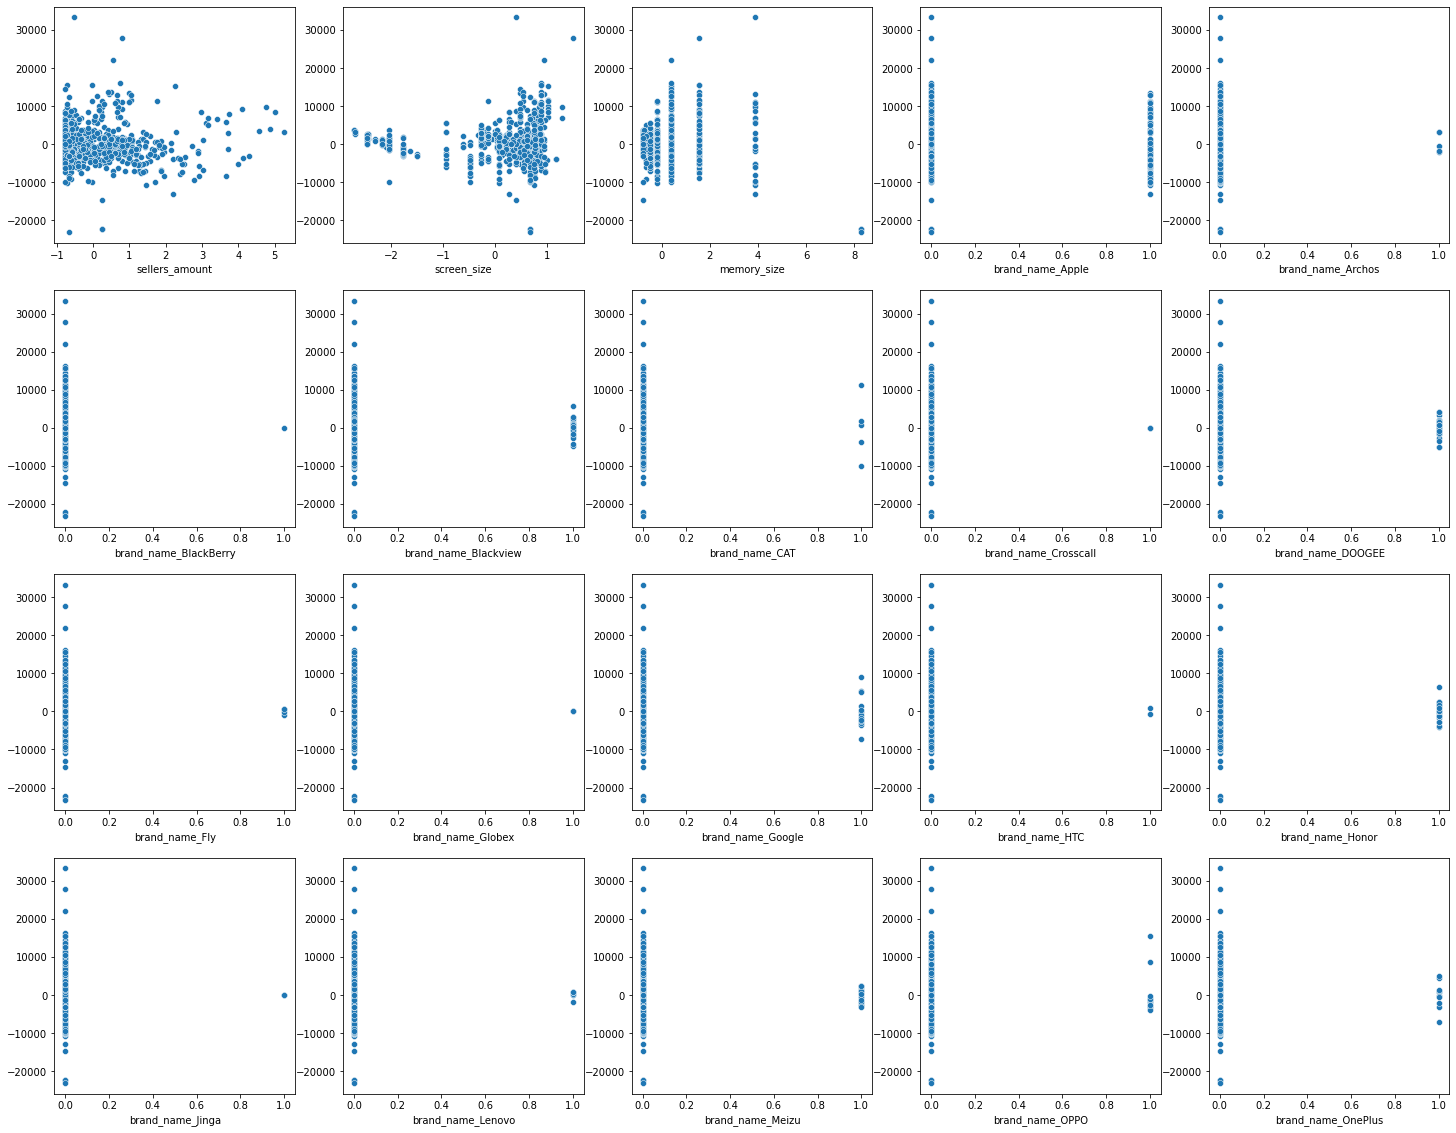

In [61]:
#Linearity of Residuals
fig, ax = plt.subplots(nrows = 4, ncols= 5, figsize=(25, 20)) 
for variable, subplot in zip(X_train.columns[1:], ax.flatten()):
    sns.scatterplot(X_train[variable], linreg_full_model_sig_var.resid , ax=subplot)
plt.show()

- From the plots we see that none of the plots show a specific pattern. Hence, we may conclude that the variables are linearly related to the dependent variable.

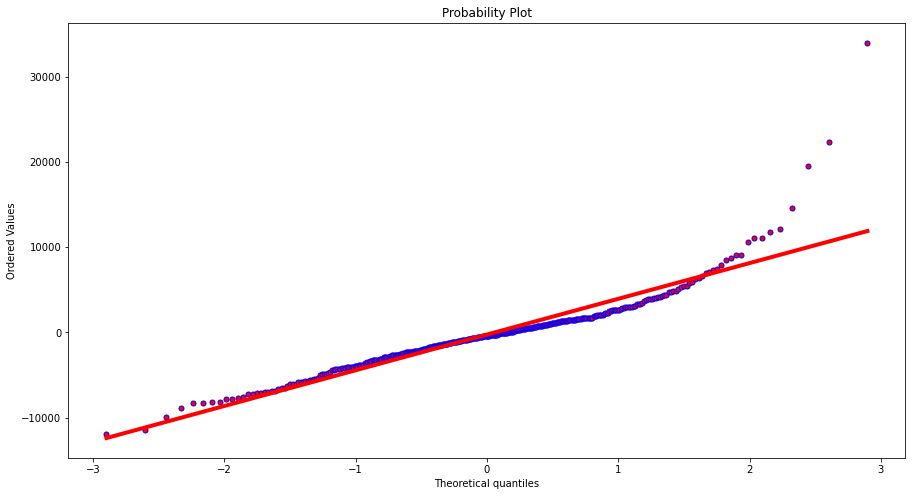

In [62]:
#normality of residual
fitted_vals = linreg_full_model_sig_var.predict(X_test)
actual_claim = y_test
# calculate residuals
resids = actual_claim - fitted_vals

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
stats.probplot(resids, plot=plt)

ax.get_lines()[0].set_marker('o')
ax.get_lines()[0].set_markersize(5.0)
ax.get_lines()[0].set_markerfacecolor('r')
ax.get_lines()[1].set_linewidth(4.0)
plt.show()

## 12. Model Validaton

### 12.1 Compute accuracy measures

#### 12.1.1 Root Mean Squared Error (RMSE)

- Lower the value of RMSE, better is the fit of the regression line.

In [62]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):
    train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

In [63]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_test = round(np.sqrt(mse_test), 4)
    return(rmse_test)

#### 12.1.2 Mean Absolute Percentage Error (MAPE)

In [64]:
# define a function to calculate MAPE
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    test_pred = model.predict(X_test)
    mape_test = mape(y_test, test_pred)
    return(mape_test)

#### 12.1.3 R-Squared and Adjusted R-Squared

In [65]:
def get_score(model):
    r_sq = model.rsquared 
    n = X_train.shape[0]
    k = X_train.shape[1]
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    return ([r_sq, r_sq_adj])

### 12.2 Tabulate the results

In [66]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

# create a function to update the score card for comparision of the scores from different algorithms
def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    global score_card
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

In [67]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression with Significant  Feature', model =linreg_full_model_sig_var)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression with Significant Feature,-,-,0.751635,0.740718,4473.683000,86.481156


In [68]:
# print training RMSE
print('RMSE on train set: ', get_train_rmse(linreg_full_model_sig_var))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(linreg_full_model_sig_var))

# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(linreg_full_model_sig_var) - get_train_rmse(linreg_full_model_sig_var))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  4616.1036
RMSE on test set:  4473.683
Difference between RMSE on train and test set:  142.42060000000038


- RMSE on the training set is **4616.1036**, while on the test set it is **4473.883**.This implies that our model has overfitted on the train set. 

### 12.2 K-Fold Cross Validation using `cross_val_score()`

In [69]:
# using cross_val_score() for k-fold cross validation
scores = cross_val_score(estimator = LinearRegression(), X = X_train, y = y_train,cv = 5,scoring = 'r2')

In [70]:
# print all scores
print('All scores: ', scores)

# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.62527557 0.73840052 0.76956595 0.75702469 0.70381423]

Minimum score obtained:  0.6253
Maximum score obtained:  0.7696
Average score obtained:  0.7188


- Score are varying,we have to do Reqularization

## 13. Regularization (OLS)

### Elastic Net Regression

In [71]:
# use ElasticNet() to perform Elastic Net regression
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

# fit the model on train data
enet.fit(X_train,y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 4767.9484


- After Applying alpha=0.1 ,  RMSE value **4767.9484**.

In [72]:
def plot_coefficients(model, algorithm_name):
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.params})
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)
    plt.ylabel('Features', fontsize = 15)

In [73]:
def plot_coefficients_1(model, algorithm_name):
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)
    plt.ylabel('Features', fontsize = 15)

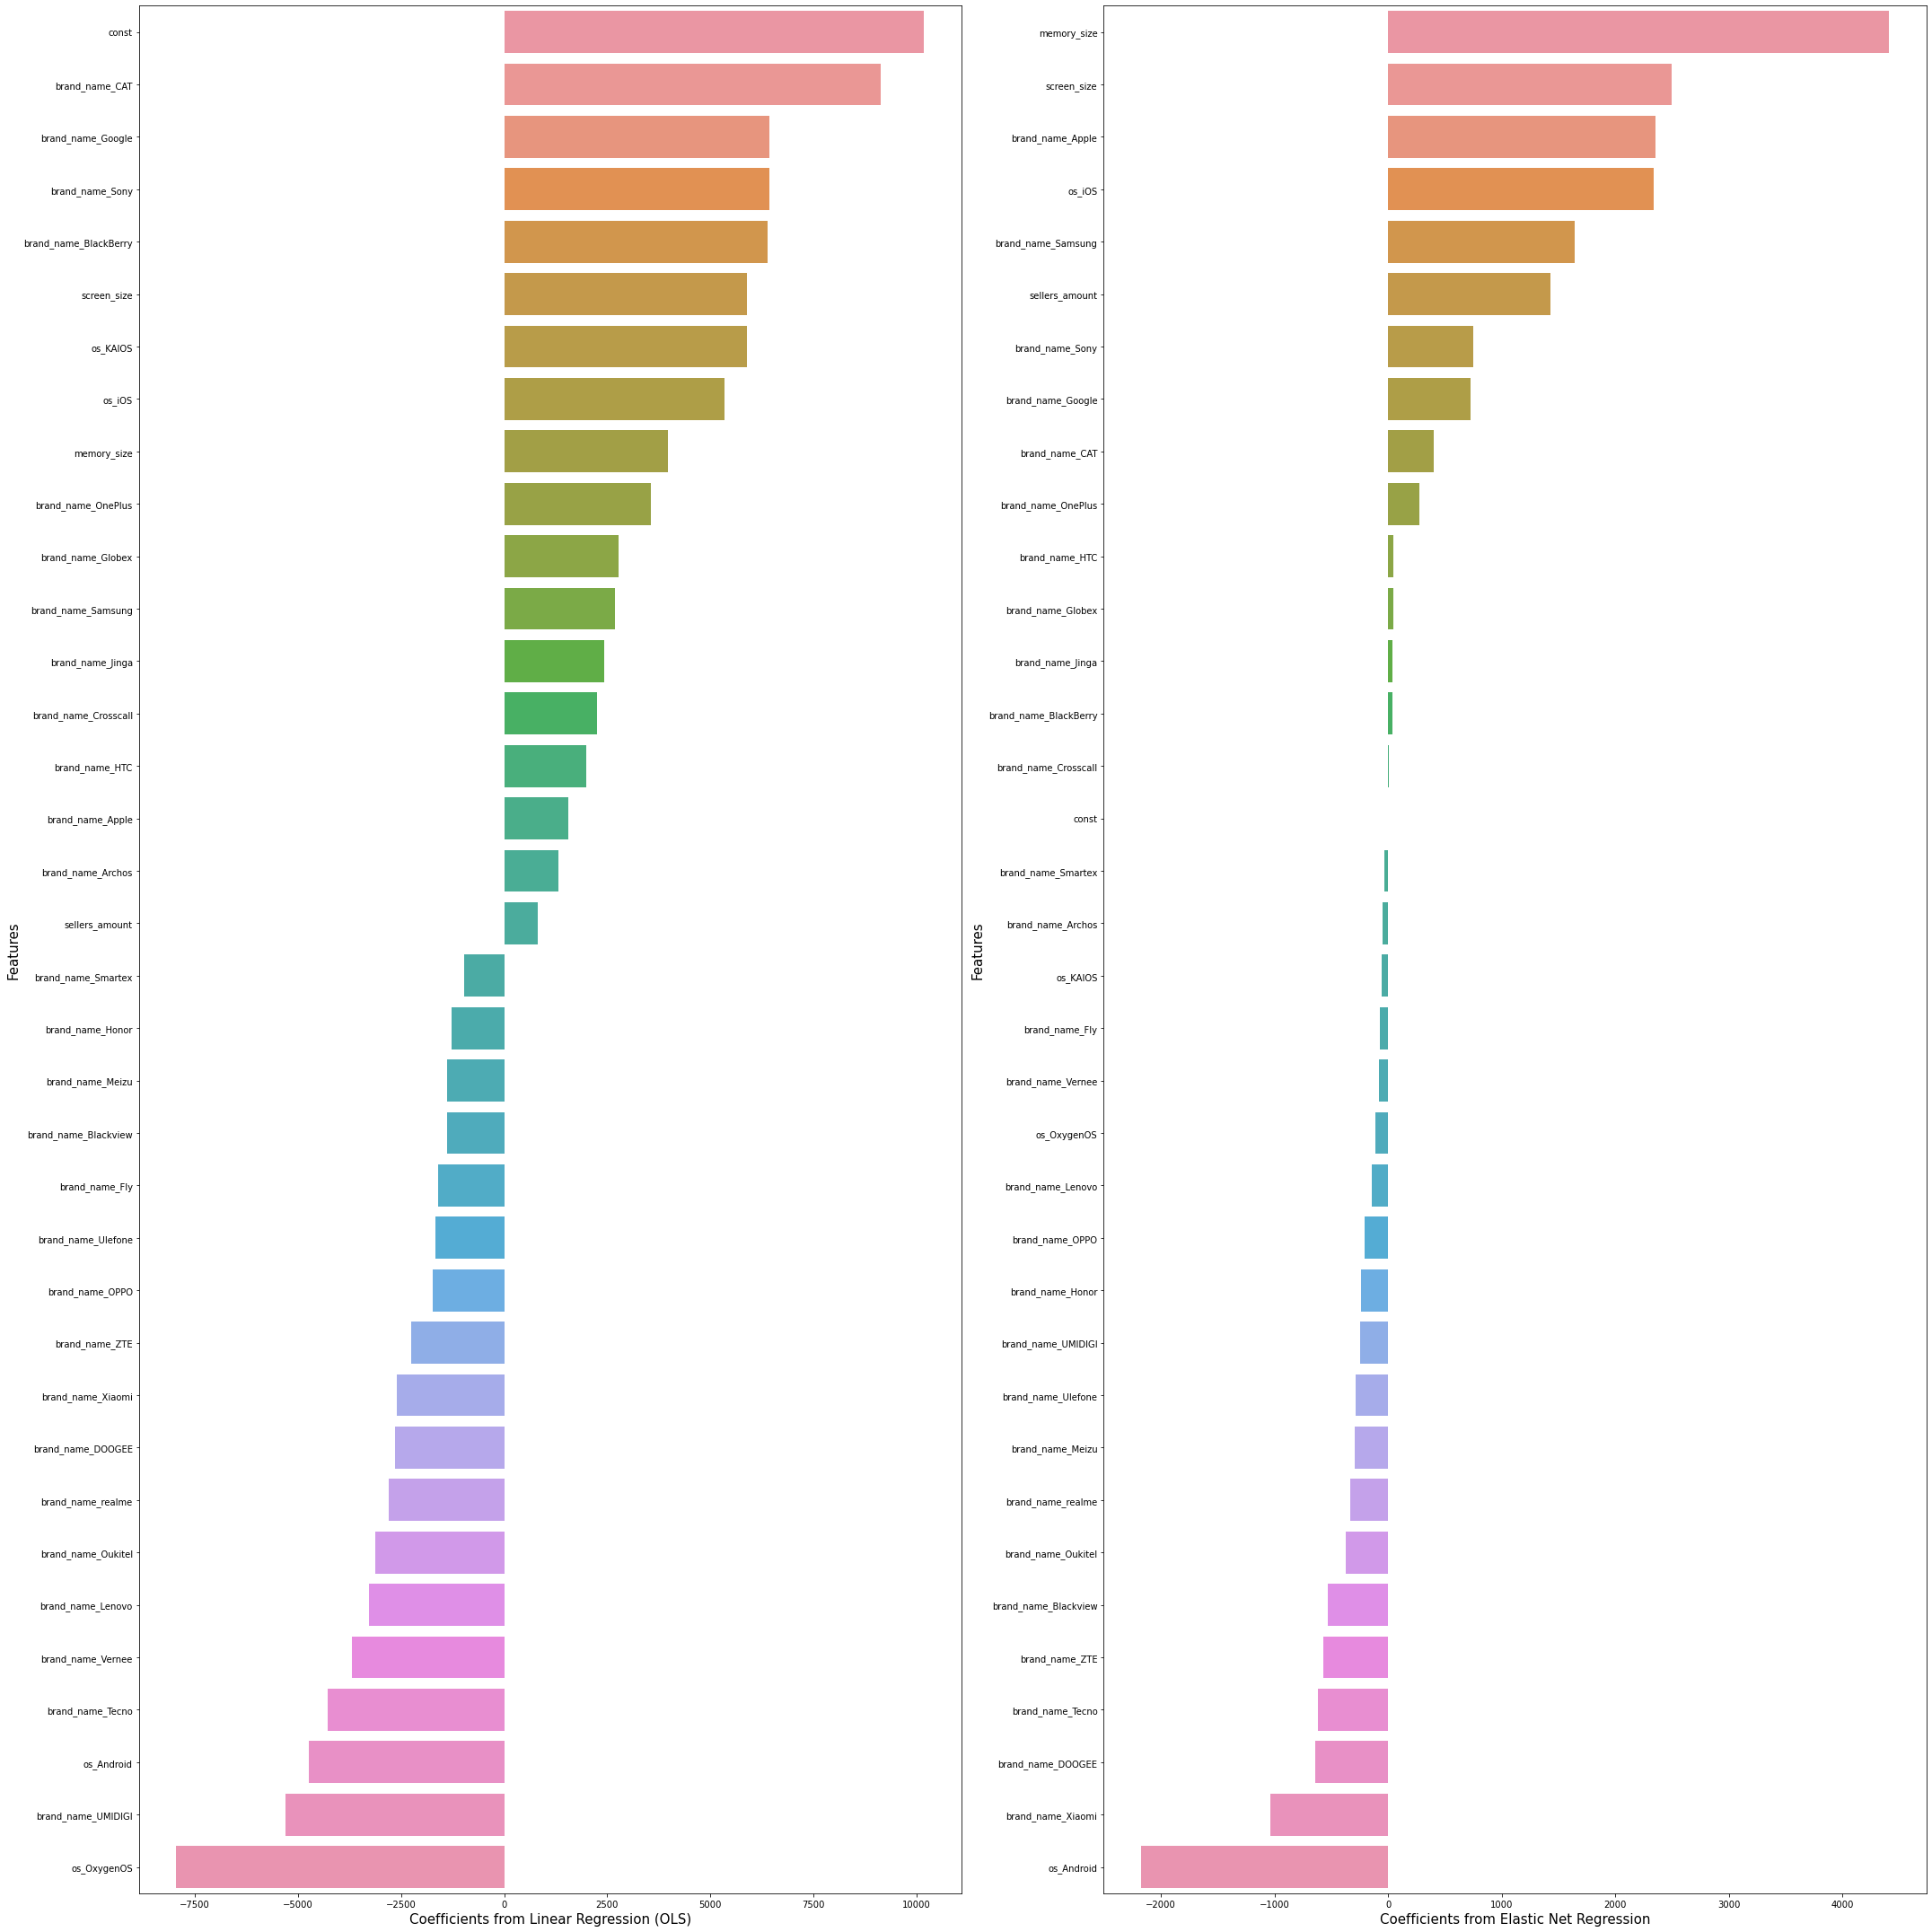

In [74]:
plt.rcParams['figure.figsize'] = [30,30]
plt.subplot(1,2,1)
plot_coefficients(linreg_full_model_sig_var, 'Linear Regression (OLS)')
plt.subplot(1,2,2)
plot_coefficients_1(enet, 'Elastic Net Regression')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

- After the **Elastic-Net** Regression,some of the cofficient are shrinked and some are diminished.

In [75]:
def get_score_e(model):
    r_sq = model.score(X_train, y_train)
    n = X_train.shape[0]
    k = X_train.shape[1]
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    return ([r_sq, r_sq_adj])

In [76]:
# create an empty dataframe to store the scores for various algorithms
score_card1 = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

# create a function to update the score card for comparision of the scores from different algorithms
def update_score_card1(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    global score_card1
    score_card1 = score_card1.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score_e(model)[0], 
                       'Adj. R-Squared': get_score_e(model)[1]}, ignore_index = True)

In [77]:
# update the dataframe 'score_card'
update_score_card1(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')


#
score_card_new=pd.concat([score_card,score_card1],axis=0)

#print the dataset
score_card_new

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression with Significant Feature,-,-,0.751635,0.740718,4473.683000,86.481156
0,Elastic Net Regression,0.1,0.01,0.700999,0.687856,4767.948400,74.383630


## 14. GridSearchCV

### 14.1 Find optimal value of alpha for `Elastic Net Regression`

In [78]:
# create a dictionary with hyperparameters and its values
tuned_paramaters = [{'alpha':[0.0001, 0.0015,0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2,0.8]}]

# initiate the elastic net regression model  
enet = ElasticNet()

enet_grid = GridSearchCV(estimator = enet, param_grid = tuned_paramaters, cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.001, 'l1_ratio': 0.2} 

RMSE on test set: 4457.4134


- With the optimal value of alpha that we got from GridSearchCV, the RMSE of test set is **4457.4134**. 

In [79]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card1(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid, 
                  alpha = enet_grid.best_params_.get('alpha'), 
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))

# print the datarframe
score_card3=pd.concat([score_card,score_card1],axis=0)
score_card3

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression with Significant Feature,-,-,0.751635,0.740718,4473.683000,86.481156
0,Elastic Net Regression,0.1,0.01,0.700999,0.687856,4767.948400,74.383630
1,Elastic Net Regression (using GridSearchCV),0.001000,0.200000,0.751078,0.740137,4457.413400,84.075396


### 14.2 Fit a elastic net model by substituting the alpha value 

In [80]:
# build a OLS model using OLS()
elastic_net_regression = sm.OLS(y_train, X_train)

# the fitted elastic net model
results_fu = elastic_net_regression.fit()

In [81]:
# fit the elastic net regression model
results_fr = elastic_net_regression.fit_regularized(method='elastic_net', 
                                                    L1_wt=0.2, 
                                                    alpha= 0.001, 
                                                    start_params=results_fu.params)

# fit elastic net regression
# model: specifies the regression model
# params: specifies the estimated parameters
# normalized_cov_params: specifies the normalized covariance parameters
elastic_net_regression_best = sm.regression.linear_model.OLSResults(model=elastic_net_regression, 
                                              params=results_fr.params, 
                                              normalized_cov_params=elastic_net_regression.normalized_cov_params)

# print the summary output
print (elastic_net_regression_best.summary())

                            OLS Regression Results                            
Dep. Variable:             best_price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     70.69
Date:                Tue, 23 Feb 2021   Prob (F-statistic):          4.64e-221
Time:                        12:06:57   Log-Likelihood:                -8437.9
No. Observations:                 856   AIC:                         1.695e+04
Df Residuals:                     820   BIC:                         1.712e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9814.31

- This model explains 75.1% of the variation in dependent variable claim. The Durbin-Watson test statistics is 1.922 and indicates that the is no autocorrelation. The Condition Number is 63.5 suggests that there is no collinearity.

## 15. Conclusion and Interpretation

In [82]:
# view the result table
score_card3

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression with Significant Feature,-,-,0.751635,0.740718,4473.683000,86.481156
0,Elastic Net Regression,0.1,0.01,0.700999,0.687856,4767.948400,74.383630
1,Elastic Net Regression (using GridSearchCV),0.001000,0.200000,0.751078,0.740137,4457.413400,84.075396


- **Elastic Net Regression (using GridSearchCV)** is the best model.